In [522]:
from koselleck import *
absw=get_words_ever_abs()
IFN='data/data.semantic_change_over_decades.1run.v5-halfdec.pkl'
DF=df=pd.read_pickle(IFN).reset_index()
df

,word,dist,is_clean,period1,period2
0,abbe,0.560645,False,1700-1705,1705-1710
1,abbey,0.691516,False,1700-1705,1705-1710
2,abbot,0.369839,True,1700-1705,1705-1710
3,abdication,0.743533,False,1700-1705,1705-1710
4,abhorrence,0.753346,False,1700-1705,1705-1710
...,...,...,...,...,...
3507627,zest,0.450700,True,1890-1895,1895-1900
3507628,zinc,0.194274,True,1890-1895,1895-1900
3507629,zone,0.444468,True,1890-1895,1895-1900
3507630,zoo,0.362270,True,1890-1895,1895-1900


In [532]:
def get_distmatrix_rateofchange(df=None,words=None):
    if df is None: df=pd.read_pickle(IFN).reset_index()
    if words:
        df=df[df.word.isin(words)]
    else:
        df=df[df.is_clean==True]
        
    pdf=df.groupby(['period1','period2']).mean().reset_index()
    pdf2=pd.DataFrame(pdf).rename(columns=dict(
            period1='period2',
            period2='period1',
        ))
    figdf=pdf.append(pdf2)
    figdf['period_int1']=figdf.period1.apply(lambda x: int(x[:4]))
    figdf['period_int2']=figdf.period2.apply(lambda x: int(x[:4]))
    figdf

    distdf=figdf.pivot('period_int1','period_int2', 'dist').fillna(0)
    return distdf

In [564]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import csv, random
import numpy as np
from scipy import spatial
extent=[1700,1900, 1700,1900]
FOOTE_W=5
NUM=100

In [565]:
# plt.rcParams["figure.figsize"] = [9.0, 6.0]
# plt.matshow(distdf, origin = 'lower', cmap = plt.cm.YlOrRd, extent = extent)
# plt.show()

In [566]:
@interact
def showdistmat(w='station'):
    try:
        distdf=get_distmatrix_rateofchange(DF, words={w})
        plt.rcParams["figure.figsize"] = [9.0, 6.0]
        plt.matshow(distdf, origin = 'lower', cmap = plt.cm.YlOrRd, extent = extent)
        plt.show()
    except Exception as e:
        pass

interactive(children=(Text(value='station', description='w'), Output()), _dom_classes=('widget-interact',))

In [569]:
# d=distdf=get_distmatrix_rateofchange(DF, words=None)#'interest'})
d=distdf=get_distmatrix_rateofchange(DF, words={'station'})
dq=d.values
distdf

period_int2,1700,1705,1710,1715,1720,1725,1730,1735,1740,1745,...,1850,1855,1860,1865,1870,1875,1880,1885,1890,1895
period_int1,,,,,,,,,,,,,,,,,,,,,
1700,0.000000,0.837711,0.737912,0.873821,0.800362,0.874269,0.658360,0.844075,0.728774,0.702517,...,0.598629,0.644937,0.675945,0.543136,0.610711,0.635342,0.595095,0.613879,0.600932,0.551740
1705,0.837711,0.000000,0.633577,0.779864,0.806146,0.928490,0.747072,0.802391,0.669596,0.738950,...,0.684212,0.713254,0.746310,0.724166,0.782965,0.738895,0.781902,0.785620,0.683996,0.705925
1710,0.737912,0.633577,0.000000,0.724451,0.747319,0.625135,0.565016,0.494439,0.599583,0.672558,...,0.836866,0.823824,0.920343,0.834309,0.917628,0.949295,0.906583,1.014010,0.972590,0.898597
1715,0.873821,0.779864,0.724451,0.000000,0.754485,0.870856,0.720202,0.698736,0.604308,0.620641,...,0.750082,0.793939,0.756829,0.783564,0.861471,0.897425,0.782333,0.899277,0.811836,0.904686
1720,0.800362,0.806146,0.747319,0.754485,0.000000,0.803857,0.713026,0.647597,0.649782,0.763318,...,0.796883,0.849756,0.863158,0.785135,0.829471,0.916162,0.890601,0.878776,0.810636,0.894594
1725,0.874269,0.928490,0.625135,0.870856,0.803857,0.000000,0.578788,0.675983,0.648122,0.623381,...,0.838026,0.865043,0.934509,0.877598,0.934786,1.009876,0.945652,0.983580,0.974296,0.938106
1730,0.658360,0.747072,0.565016,0.720202,0.713026,0.578788,0.000000,0.564701,0.443608,0.543000,...,0.675448,0.651036,0.683557,0.632834,0.730560,0.834424,0.781244,0.859825,0.855489,0.855096
1735,0.844075,0.802391,0.494439,0.698736,0.647597,0.675983,0.564701,0.000000,0.495410,0.605813,...,0.754052,0.795114,0.757775,0.733454,0.823723,0.843935,0.801361,0.936030,0.828897,0.817027
1740,0.728774,0.669596,0.599583,0.604308,0.649782,0.648122,0.443608,0.495410,0.000000,0.328995,...,0.551427,0.598215,0.638519,0.577299,0.673443,0.705969,0.667482,0.756656,0.724307,0.739409


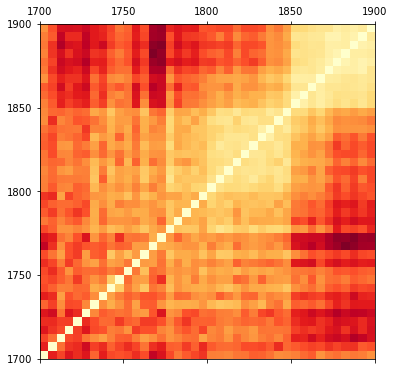

In [570]:
plt.rcParams["figure.figsize"] = [9.0, 6.0]
plt.matshow(distdf, origin = 'lower', cmap = plt.cm.YlOrRd, extent = extent)
plt.show()

In [571]:
def make_foote(quart=FOOTE_W):
#     quart=FOOTE_W
    tophalf = [-1] * quart + [1] * quart
    bottomhalf = [1] * quart + [-1] * quart
    foote = list()
    for i in range(quart):
        foote.append(tophalf)
    for i in range(quart):
        foote.append(bottomhalf)
    foote = np.array(foote)
    return foote

def foote_novelty(distdf, foote_size=5):
    foote=make_foote(foote_size)
    distmat = distdf.values if type(distdf)==pd.DataFrame else distdf
    
    axis1, axis2 = distmat.shape
    assert axis1 == axis2
    distsize = axis1
    axis1, axis2 = foote.shape
    assert axis1 == axis2
    halfwidth = axis1 / 2
    novelties = []
    for i in range(distsize):
        start = int(i - halfwidth)
        end = int(i + halfwidth)
        if start < 0 or end > (distsize - 1):
            novelties.append(0)
        else:
            novelties.append(np.sum(foote * distmat[start: end, start: end]))
    return novelties

def getyears():
    years=list(d.columns)
    return years

In [572]:
# novelties = foote_novelty(distdf)
# plt.plot(getyears(), novelties)
# plt.show()
# print("Max novelty for a five-year half-width: " + str(np.max(novelties)))

In [573]:
def diagonal_permute(d):
    newmat = np.zeros(d.shape)
    
    # We create one randomly-permuted list of integers called "translate"
    # that is going to be used for the whole matrix.
    
    xlen,ylen=d.shape
    translate = [i for i in range(xlen)]
    random.shuffle(translate)
    
    # Because distances matrices are symmetrical, we're going to be doing
    # two diagonals at once each time. We only need one set of values
    # (because symmetrical) but we need two sets of indices in the original
    # matrix so we know where to put the values back when we're done permuting
    # them.
    
    for i in range(0, xlen):
        indices1 = []
        indices2 = []
        values = []
        for x in range(xlen):
            y1 = x + i
            y2 = x - i
            if y1 >= 0 and y1 < ylen:
                values.append(d[x, y1])
                indices1.append((x, y1))
            if y2 >= 0 and y2 < ylen:
                indices2.append((x, y2))
        
        # Okay, for each diagonal, we permute the values.
        # We'll store the permuted values in newvalues.
        # We also check to see how many values we have,
        # so we can randomly select values if needed.
        
        newvalues = []
        lenvals = len(values)
        vallist = [i for i in range(lenvals)]
        
        for indexes, value in zip(indices1, values):
            x, y = indexes
            
            xposition = translate[x]
            yposition = translate[y]
            
            # We're going to key the randomization to the x, y
            # values for each point, insofar as that's possible.
            # Doing this will ensure that specific horizontal and
            # vertical lines preserve the dependence relations in
            # the original matrix.
            
            # But the way we're doing this is to use the permuted
            # x (or y) values to select an index in our list of
            # values in the present diagonal, and that's only possible
            # if the list is long enough to permit it. So we check:
            
            if xposition < 0 and yposition < 0:
                position = random.choice(vallist)
            elif xposition >= lenvals and yposition >= lenvals:
                position = random.choice(vallist)
            elif xposition < 0:
                position = yposition
            elif yposition < 0:
                position = xposition
            elif xposition >= lenvals:
                position = yposition
            elif yposition >= lenvals:
                position = xposition
            else:
                position = random.choice([xposition, yposition])
                # If either x or y could be used as an index, we
                # select randomly.
            
            # Whatever index was chosen, we use it to select a value
            # from our diagonal. 
            
            newvalues.append(values[position])
            
        values = newvalues
        
        # Now we lay down (both versions of) the diagonal in the
        # new matrix.
        
        for idxtuple1, idxtuple2, value in zip(indices1, indices2, values):
            x, y = idxtuple1
            newmat[x, y] = value
            x, y = idxtuple2
            newmat[x, y] = value
    
    return newmat

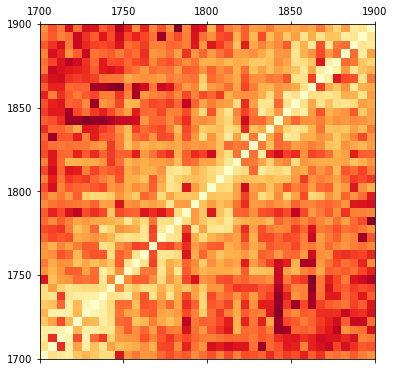

In [574]:
newmat = diagonal_permute(distdf.values)
plt.matshow(newmat, origin = 'lower', cmap = plt.cm.YlOrRd, extent = extent)
plt.show()

What if we now try assessing foote novelties on this randomized matrix? What maximum or minimum value will we get?

In [575]:
# novelties = foote_novelty(newmat)
# years = getyears()
# plt.plot(years, novelties)
# plt.show()
# print("Max novelty for five-year half-width:" + str(np.max(novelties)))

# def zeroless(sequence):
#     newseq = []
#     for element in sequence:
#         if element > 0.01:
#             newseq.append(element)
#     return newseq
# print("Min novelty for five-year half-width:" + str(np.min(zeroless(novelties))))

In [576]:
def permute_test(distmatrix, foote_size=FOOTE_W):
    actual_novelties = foote_novelty(distmatrix, foote_size)
    
    permuted_peaks = []
    permuted_troughs = []
    xlen,ylen=distmatrix.shape
    for i in range(100):
        randdist = diagonal_permute(distmatrix)
        nov = foote_novelty(randdist, foote_size)
        nov = zeroless(nov)
        permuted_peaks.append(np.max(nov))
        permuted_troughs.append(np.min(nov))
    permuted_peaks.sort(reverse = True)
    permuted_troughs.sort(reverse = True)
    threshold05 = permuted_peaks[4]
    threshold01 = permuted_peaks[0]
    threshold95 = permuted_troughs[94]
    threshold99 = permuted_troughs[99]
    threshold90 = permuted_troughs[89]
    threshold10 = permuted_troughs[9]
#     print(threshold05)
#     print(threshold95)
    
    significance = np.ones(len(actual_novelties))
    for idx, novelty in enumerate(actual_novelties):
#         print(idx,novelty,threshold05,threshold95)

        if novelty > threshold10 or novelty < threshold90:
            significance[idx] = 0.099
        if novelty > threshold05 or novelty < threshold95:
            significance[idx] = 0.049
        elif novelty > threshold01 or novelty < threshold99:
            significance[idx] = 0.009
    
    return actual_novelties, significance, threshold01, threshold05, threshold95, threshold99

def colored_segments(novelties, significance, yrwidth=1,min_year=1700):
    x = []
    y = []
    t = []
    idx = 0
    for nov, sig in zip(novelties, significance):
        if nov > 1:
            x.append((idx*yrwidth) + min_year)
            y.append(nov)
            t.append(sig)
        idx += 1
        
    x = np.array(x)
    y = np.array(y)
    t = np.array(t)
    
#     print(x)
#     print(y)
#     print(t)
    
    points = np.array([x,y]).transpose().reshape(-1,1,2)
    segs = np.concatenate([points[:-1],points[1:]],axis=1)
    lc = LineCollection(segs, cmap=plt.get_cmap('jet'))
    lc.set_array(t)
    
    return lc, x, y
    

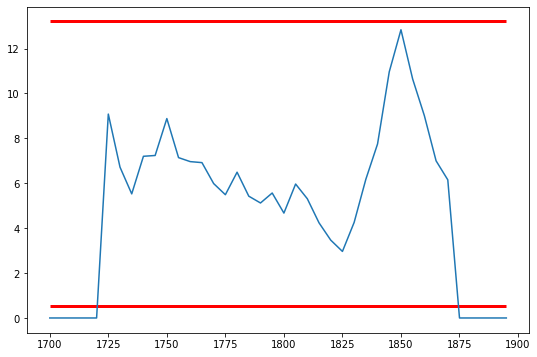

In [577]:

novelties, significance, threshold01, threshold05, threshold95, threshold99 = permute_test(dq)
years = getyears()
plt.plot(years, novelties)
startpoint = years[0]
endpoint = years[-1]
plt.hlines(threshold05, startpoint, endpoint, 'r', linewidth = 3)
plt.hlines(threshold95, startpoint, endpoint, 'r', linewidth = 3)
plt.show()

# lc, x, y = colored_segments(novelties, significance)

# plt.gca().add_collection(lc) # add the collection to the plot
# plt.xlim(years[0], years[-1]) # line collections don't auto-scale the plot
# plt.ylim(y.min(), y.max())
# plt.show()

## Visualization

Neither of the methods used above are terribly good as visualizations, so let's come up with a slightly better version: getting rid of the misleading "edges" and overplotting points to indicate the number of significant observations in particular periods.

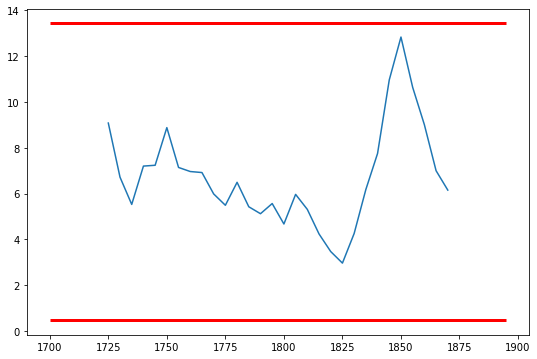

In [578]:
def zeroless_seq(thefilter, filtereda, filteredb):
    thefilter = np.array(thefilter)
    filtereda = np.array(filtereda)
    filteredb = np.array(filteredb)
    filtereda = filtereda[thefilter > 0]
    filteredb = filteredb[thefilter > 0]
    thefilter = thefilter[thefilter > 0]
    return thefilter, filtereda, filteredb

plt.clf()
# plt.axis([1700, 1900, 45, 325])
novelties, significance, threshold01, threshold05, threshold95, threshold99 = permute_test(d.values)
novelties, years, significance = zeroless_seq(novelties, getyears(), significance)
yplot = novelties[significance < 0.05]
xplot = years[significance < 0.05]
plt.scatter(xplot, yplot, c = 'red')
plt.plot(years, novelties)
years = getyears()
startpoint = years[0]
endpoint = years[-1]
plt.hlines(threshold05, startpoint, endpoint, 'r', linewidth = 3)
plt.hlines(threshold95, startpoint, endpoint, 'r', linewidth = 3)
plt.show()

## Effect size

What about the effect size? Foote novelty is not really a direct measurement of the pace of change.

One way to measure it is, to accept the periods defined by the visualization above, and compare change across each of those periods. 

So, for instance, the significant points in the second peak range from 1990 to 1994, and the lowest trough is roughly 2001 to 2005. We can divide each of those periods in half, and compare the first half to the second half. It looks like Mauch et al. are roughly right about effect size: it's a sixfold difference.

In [579]:
def pacechange(startdate, enddate, pca):
    years = getyears()
    startidx = years.index(startdate)
    endidx = years.index(enddate)
    midpoint = int((startidx + endidx)/2)
    firsthalf = np.zeros(len(years))
    for i in range(startidx,midpoint):
        firsthalf = firsthalf + pca[i]
    secondhalf = np.zeros(len(years))
    for i in range(midpoint, endidx):
        secondhalf = secondhalf + pca[i]
    return spatial.distance.cosine(firsthalf, secondhalf)

print(pacechange(1700, 1750, d.values))
print(pacechange(1750, 1800, d.values))
print(pacechange(1800, 1850, d.values))
print(pacechange(1850, 1890, d.values))


0.01391864345575422
0.009738717209275993
0.009485015991162582
0.009550622649499796


We can also get a mean value for the whole run.

In [580]:
thesum = 0
theobservations = 0
for i in range(1700, 1890, 10):
    theobservations += 1
    thesum += pacechange(i, i+10, d.values)
print(thesum / theobservations)

0.02160036781132307


## Comparing multiple scales at once

If we wanted to, we could also overplot multiple scales of comparison with different half-widths. Doing this reveals one of the nice things about the "Foote novelty" method, which is that it remains relatively stable as you vary scales of comparison. The same cannot be said, for instance, of changepoint analysis!

In the cell below we've overplotted three-year, four-year, and five-year Foote novelties, highlighting in each case the specific quarters that have two-tailed p values lower than 0.05.

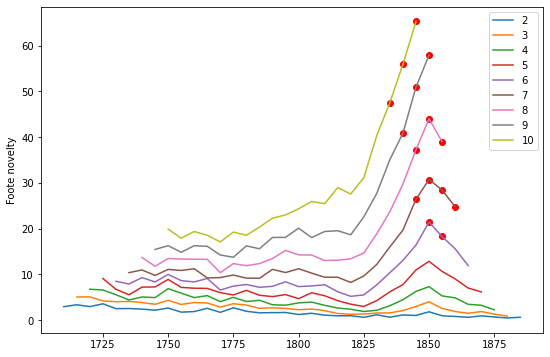

In [581]:
# plt.axis([1700, 1900, 0, y.max() + 10])
    
def add_scatter(d, width):
    novelties, significance, threshold01, threshold05, threshold95, threshold99 = permute_test(d, width)
    novelties, years, significance = zeroless_seq(novelties, getyears(), significance)
    yplot = novelties[significance < 0.05]
    xplot = years[significance < 0.05]
    plt.scatter(xplot, yplot, c = 'red')
    plt.plot(years, novelties)

ll=list(range(2,11))
for n in ll:
    add_scatter(d.values, n)
# add_scatter(d.values, 4)
# add_scatter(d.values, 5)
# add_scatter(d.values, 5)
plt.legend([str(n) for n in ll])
plt.ylabel('Foote novelty')
plt.show()